In [2756]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# unbalanced data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Validation libraries
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score, recall_score, mean_squared_error, precision_recall_curve, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#reading in test/training dataset
data_qA = pd.read_csv('/Users/ioana/Desktop/DS4A_workspace/project_mentalHealth/codes/data/dataqA.csv')
#train_df = pd.read_csv('/Users/ioana/Desktop/DS4A_workspace/project_mentalHealth/codes/data/train_dataqA.csv')
#train_df = pd.read_csv('/Users/ioana/Desktop/DS4A_workspace/project_mentalHealth/codes/data/train_dataqA_balanced_ds.csv')
#train_df = pd.read_csv('/Users/ioana/Desktop/DS4A_workspace/project_mentalHealth/codes/data/train_dataqA_balanced_ros.csv')
#train_df = pd.read_csv('/Users/ioana/Desktop/DS4A_workspace/project_mentalHealth/codes/data/train_dataqA_balanced_smote.csv')
#train_df = pd.read_csv('/Users/ioana/Desktop/DS4A_workspace/project_mentalHealth/codes/train_dataqA_balanced_smote_randstate1753.csv')
#test_df = pd.read_csv('/Users/ioana/Desktop/DS4A_workspace/project_mentalHealth/codes/data/test_dataqA.csv')

In [2757]:
threshold = 0.8
train_dframe = data_qA.sample(random_state = 0, frac = threshold)
test_dframe = data_qA.drop(train_dframe.index)

In [2758]:
train_dframe.shape

(669, 21)

In [2759]:
test_dframe.shape

(167, 21)

In [2760]:
#train_df = train_df.drop(columns = ['Unnamed: 0','Is_tech','Have_MHD','Work_interference_with_Treatment','Work_interference_without_Treatment'])
train_dframe = train_dframe.drop(columns = ['Unnamed: 0'])
train_dframe.columns

Index(['Age', 'Anonymity_protection', 'Company_size',
       'Coworkers_comfortable_talking',
       'Discouranged_in_revealing_MHD_at_work', 'Family_history_MHD', 'Gender',
       'Have_MHD', 'Is_tech', 'MHD_identification_effect_on_career',
       'MHD_identification_team_reaction', 'Medical_leave_MH',
       'MentalH_company_info', 'MentalH_company_resources',
       'MentalH_insurance', 'Past_MHD', 'Superviser_comfortable_talking',
       'Treatment_sought', 'Work_interference_with_Treatment',
       'Work_interference_without_Treatment'],
      dtype='object')

In [2761]:
train_dframe.head()
train_dframe.tail()

,Age,Anonymity_protection,Company_size,Coworkers_comfortable_talking,Discouranged_in_revealing_MHD_at_work,Family_history_MHD,Gender,Have_MHD,Is_tech,MHD_identification_effect_on_career,MHD_identification_team_reaction,Medical_leave_MH,MentalH_company_info,MentalH_company_resources,MentalH_insurance,Past_MHD,Superviser_comfortable_talking,Treatment_sought,Work_interference_with_Treatment,Work_interference_without_Treatment
464,57.0,2,3,1,-1,2,1,1,1.0,-1.0,4.0,2,0,2,1,1,1,1,2,1
25,32.0,2,4,2,0,1,1,1,1.0,0.0,8.0,3,1,1,1,1,1,1,2,1
110,30.0,2,2,1,-1,2,1,1,1.0,-1.0,4.0,3,0,0,2,1,1,1,2,1
149,32.0,2,6,1,0,1,1,1,1.0,-1.0,5.0,2,1,1,1,1,0,1,3,1
152,33.0,1,4,2,0,1,1,1,1.0,0.0,9.0,4,1,1,1,1,2,1,3,2


In [2762]:
# choose the type of re-ampling: 0 - no resampling, 1 - random down sampling, 2 - random up sampling, 3 - smote
chooseSamplingParam = 0

In [2763]:
def downsampling(dataDF):
    c1 = dataDF[dataDF['Treatment_sought'] == 1]
    c2 = dataDF[dataDF['Treatment_sought'] == 0]
    print(c1.shape)
    print(c2.shape)
    m1,n1 = c1.shape
    m2,n2 = c2.shape
    print(m2/m1)
    c1 = c1.sample(frac = m2/m1)
    print(c1.shape)

    df_balanced = c1.append(c2)
    print(df_balanced.head())
    print(df_balanced.shape)

    return df_balanced

In [2764]:
def upsampling_ROS(dataDF):
    y = np.array(dataDF['Treatment_sought'])
    y = y.astype(np.int)
    indexTs = dataDF.columns.get_loc('Treatment_sought')
    dataX = dataDF.drop(columns = ['Treatment_sought'])
    cols = dataX.columns
    X = dataX.values
    X = X.astype(np.float)

    print('Original dataset shape %s' % Counter(y))
    ros = RandomOverSampler(random_state=0)
    X_res, y_res = ros.fit_resample(X, y)
    print('ROS - Resampled dataset shape %s' % Counter(y_res))
    print(X_res)
    print(y_res)

    dict_all = {cols[i]:X[:,i] for i in range(len(cols))}
    dataDF_res = pd.DataFrame(X_res,columns= cols)
    dataDF_res.insert(indexTs,'Treatment_sought',y_res,True)

    return dataDF_res

In [2765]:
def upsampling_SMOTE(dataDF):
    y = np.array(dataDF['Treatment_sought'])
    y = y.astype(np.int)
    indexTs = dataDF.columns.get_loc('Treatment_sought')
    dataX = dataDF.drop(columns = ['Treatment_sought'])
    cols = dataX.columns
    print('inside smote...', cols)
    X = dataX.values
    X = X.astype(np.float)
    indxList = []
    for ic in cols:
        indx = dataX.columns.get_loc(ic)
        indxList.append(indx)
        print(ic)
    print(indxList)

    print('Original dataset shape %s' % Counter(y))
    #X_res, y_res = SMOTENC(sampling_strategy='minority', random_state=42).fit_resample(X, y)
    X_res, y_res = SMOTENC(random_state=0, categorical_features=[0,1,2,3,4,5,6,9,10,11,12,13,14,15,16]).fit_resample(X, y)
    print('SMOTE - Resampled dataset shape %s' % Counter(y_res))
    print(X_res)
    print(y_res)

    dict_all = {cols[i]:X[:,i] for i in range(len(cols))}
    dataDF_res = pd.DataFrame(X_res,columns= cols)
    dataDF_res.insert(indexTs,'Treatment_sought',y_res,True)

    return dataDF_res

In [2766]:
def samplingChoice(param,dataDF):
    if param == 1:
        result_df = downsampling(dataDF)
    elif param == 2:
        result_df = upsampling_ROS(dataDF)
    elif param == 3:
        result_df = upsampling_SMOTE(train_dframe)
        #result_df.head()
        print(result_df.tail())
    else:
        result_df = dataDF
    return result_df

train_df = samplingChoice(chooseSamplingParam,train_dframe)

  class  frequencyRate               type
0    -1       0.112108     With Treatment
1    -1       0.058296  Without Treatment
2     1       0.061286     With Treatment
3     1       0.606876  Without Treatment
4     2       0.393124     With Treatment
5     2       0.288490  Without Treatment
6     3       0.360239     With Treatment
7     3       0.040359  Without Treatment
8     4       0.073244     With Treatment
9     4       0.005979  Without Treatment


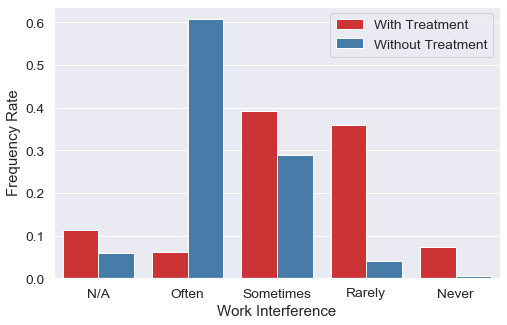

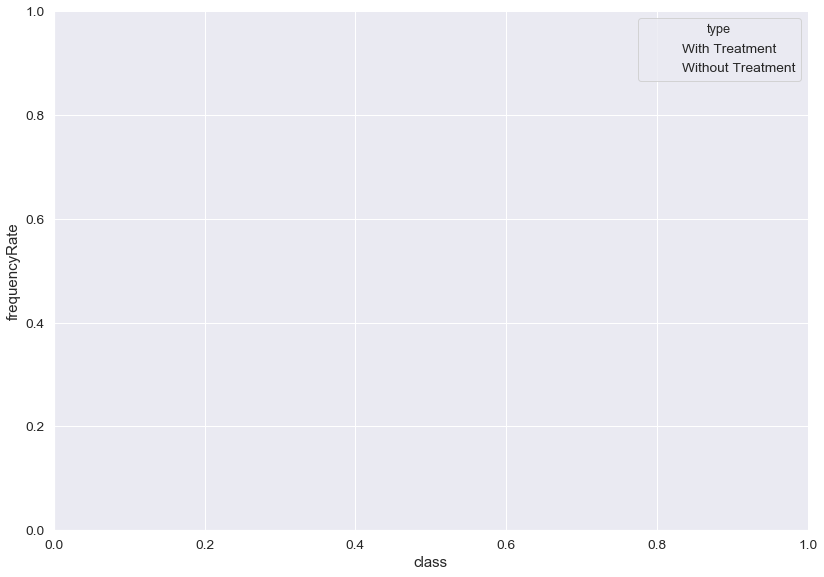

In [2894]:
feat = ['Work_interference_with_Treatment','Work_interference_without_Treatment']
df1 = train_df[feat[0]]
m1 = len(df1)
unique1,withT = np.unique(df1, return_counts=True)
df2 = train_df[feat[1]]
m2 = len(df2)
unique2,withoutT = np.unique(df2, return_counts=True)

df_all = pd.DataFrame(columns = ['class','frequencyRate','type'])
for i in range(len(unique1)):
    dict_i = {'class':unique1[i],'frequencyRate':withT[i]/m1,'type':'With Treatment'}
    dict_j = {'class':unique2[i],'frequencyRate':withoutT[i]/m2,'type':'Without Treatment'}
    df_i = pd.DataFrame(dict_i,columns = ['class','frequencyRate','type'], index = [0])
    df_j = pd.DataFrame(dict_j,columns = ['class','frequencyRate','type'], index = [0])
    df_all = df_all.append(df_i, ignore_index = True)
    df_all = df_all.append(df_j, ignore_index = True)

#withoutT = [df2.count(x) for x in df2]
print(df_all)

#plt.figure(figsize=(20,5))
fig, ax = plt.subplots(figsize=(8,5))
g = sns.catplot(x='class', y='frequencyRate', hue='type', data=df_all, kind='bar', palette = 'Set1', height=8.27, aspect=11.7/8.27, legend=True, legend_out=False, ax=ax)

#plt.title('Work interference')
ax.set_ylabel('Frequency Rate')
ax.set_xlabel('Work Interference')
ax.set_xticklabels(['N/A','Often', 'Sometimes', 'Rarely', 'Never'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
fig.savefig('plots_qA/plot_workInterference_frequencyRate.png')
        

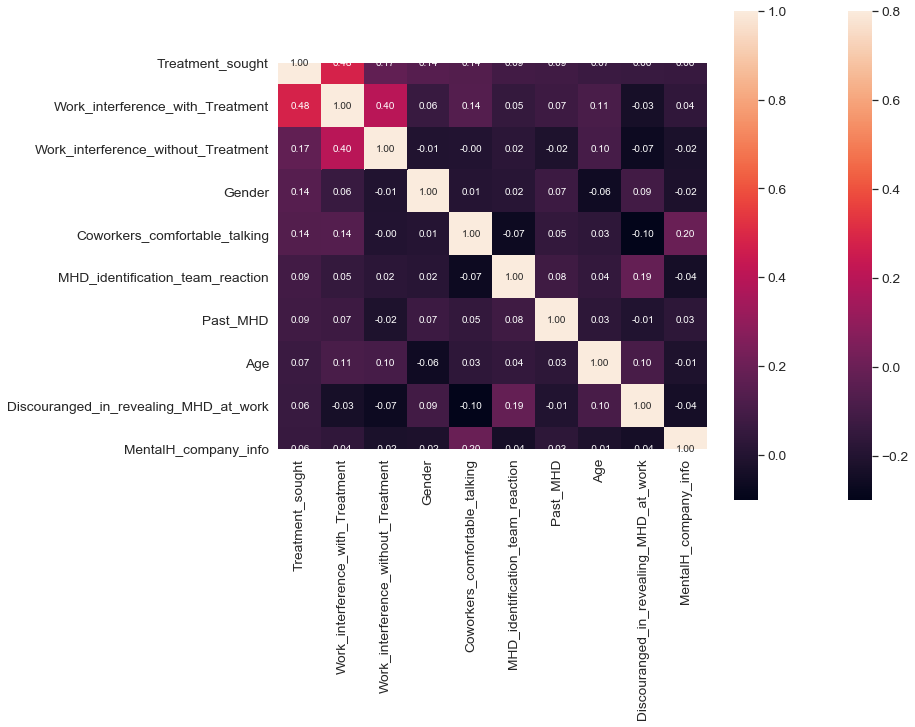

In [2885]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#plt.show()
plt.savefig('plots_qA/correlationMatrix.png')


#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Treatment_sought')['Treatment_sought'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

Text(0.5, 12.199999999999974, 'Superviser comforable talking')

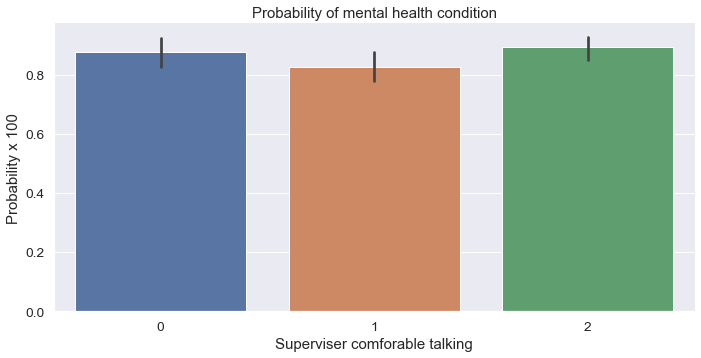

In [2858]:
g = sns.catplot(x="Superviser_comfortable_talking", y="Treatment_sought", data=train_df, kind="bar", ci=95, height=5, aspect=2, legend_out = True)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Superviser comforable talking')
#g.set_xticklabels(['No', 'Yes', 'Unsure']);
# those who said yes were more likely to seek treatment

  class  frequencyRate                  type
0     0       0.226252      Treatment sought
1     0       0.388889  Treatment not sought
2     1       0.452504      Treatment sought
3     1       0.422222  Treatment not sought
4     2       0.321244      Treatment sought
5     2       0.188889  Treatment not sought
1    0
3    1
5    2
Name: class, dtype: object
1    0.388889
3    0.422222
5    0.188889
Name: frequencyRate, dtype: float64


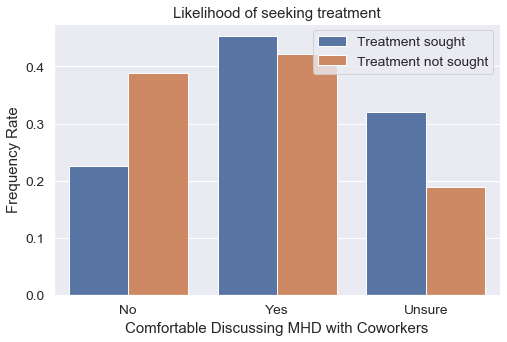

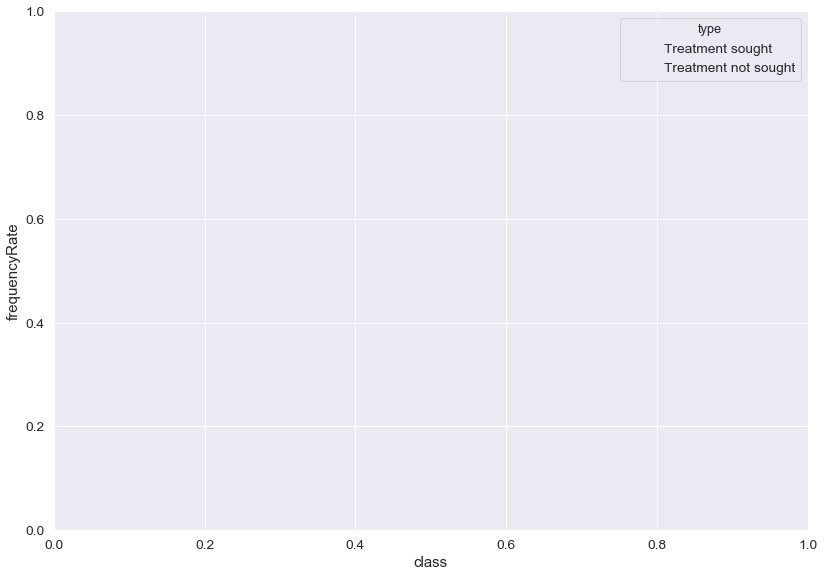

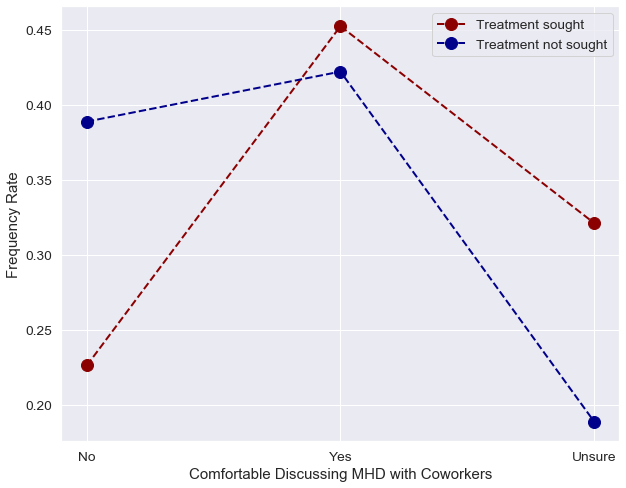

In [2887]:
feat = ['Treatment_sought','Coworkers_comfortable_talking']
df1 = train_df[train_df[feat[0]]==1][feat[1]]
m1 = len(df1)
unique1,withT = np.unique(df1, return_counts=True)
df2 = train_df[train_df[feat[0]]==0][feat[1]]
m2 = len(df2)
unique2,withoutT = np.unique(df2, return_counts=True)

df_all = pd.DataFrame(columns = ['class','frequencyRate','type'])
for i in range(len(unique1)):
    dict_i = {'class':unique1[i],'frequencyRate':withT[i]/m1,'type':'Treatment sought'}
    dict_j = {'class':unique2[i],'frequencyRate':withoutT[i]/m2,'type':'Treatment not sought'}
    df_i = pd.DataFrame(dict_i,columns = ['class','frequencyRate','type'], index = [0])
    df_j = pd.DataFrame(dict_j,columns = ['class','frequencyRate','type'], index = [0])
    df_all = df_all.append(df_i, ignore_index = True)
    df_all = df_all.append(df_j, ignore_index = True)

#withoutT = [df2.count(x) for x in df2]
print(df_all)

fig, ax = plt.subplots(figsize=(8,5))
g = sns.catplot(x='class', y='frequencyRate', hue='type', data=df_all, kind='bar', height=8.27, aspect=11.7/8.27, legend=True, legend_out=False, ax=ax)
ax.set_title('Likelihood of seeking treatment')
ax.set_ylabel('Frequency Rate')
ax.set_xlabel('Comfortable Discussing MHD with Coworkers')
ax.set_xticklabels(['No','Yes', 'Unsure'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
fig.savefig('plots_qA/plot_bars_Coworkers_comfortable_talking_frequencyRate.png')

'''
g = sns.catplot(x="Coworkers_comfortable_talking", y="Treatment_sought", data=train_df, kind="bar", ci=95, height=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Comfortable Discussing MHD with Coworkers')
g.set_xticklabels(['No', 'Yes', 'Unsure']);
# those who said yes were more likely to seek treatment
'''

cls1 = df_all[df_all['type']=='Treatment sought']['class']
freqR1 = df_all[df_all['type']=='Treatment sought']['frequencyRate']
cls0 = df_all[df_all['type']=='Treatment not sought']['class']
freqR0 = df_all[df_all['type']=='Treatment not sought']['frequencyRate']
print(cls0)
print(freqR0)
plt.figure(figsize=(10,8))
#plt.subplot(211)
plt.plot(cls1, freqR1, 'ok', color = 'darkred', marker='o', linestyle='dashed',linewidth=2, markersize=12, label='Treatment sought')
plt.plot(cls0, freqR0, 'ok', color = 'darkblue', marker='o', linestyle='dashed',linewidth=2, markersize=12, label='Treatment not sought')
plt.grid(True)
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Frequency Rate')
#ax.set_title('')
plt.xticks(ticks=[0,1,2],labels=['No','Yes', 'Unsure'])
#plt.xticks(['No','Yes', 'Unsure'])
plt.xlabel('Comfortable Discussing MHD with Coworkers')
plt.legend()
plt.savefig('plots_qA/plot_markers_Coworkers_comfortable_talking_frequencyRate.png')


413    1
424    2
752    0
478    2
158    1
      ..
464    0
25     1
110    0
149    1
152    1
Name: MentalH_company_info, Length: 579, dtype: int64
140    2
311    0
658    1
142    0
791    0
      ..
724    1
207    0
438    0
274    0
710    2
Name: MentalH_company_info, Length: 90, dtype: int64
  class  frequencyRate                  type
0     0       0.645941      Treatment sought
1     0       0.766667  Treatment not sought
2     1       0.264249      Treatment sought
3     1       0.133333  Treatment not sought
4     2       0.089810      Treatment sought
5     2       0.100000  Treatment not sought
1    0
3    1
5    2
Name: class, dtype: object
1    0.766667
3    0.133333
5    0.100000
Name: frequencyRate, dtype: float64


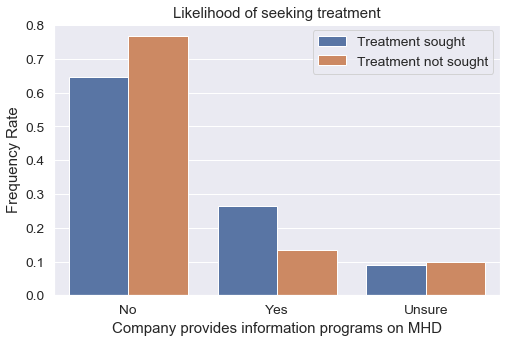

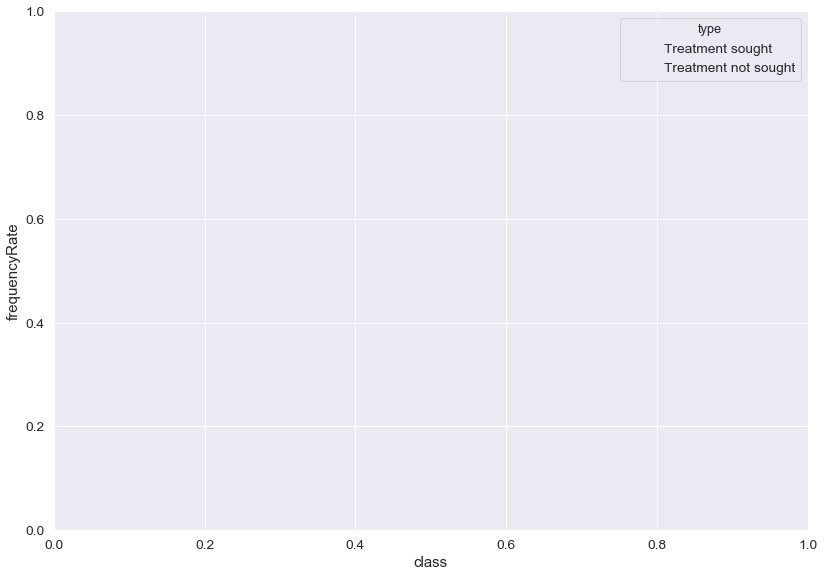

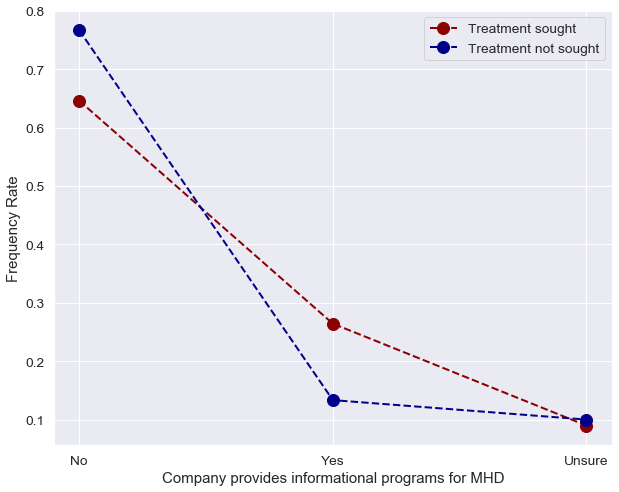

In [2888]:
feat = ['Treatment_sought','MentalH_company_info']
df11 = train_df[train_df[feat[0]]==1]
df1 = df11[df11[feat[1]] != -1][feat[1]]
m1 = len(df1)
print(df1)
unique1,withT = np.unique(df1, return_counts=True)
df21 = train_df[train_df[feat[0]]==0]
df2 = df21[df21[feat[1]] != -1][feat[1]]
m2 = len(df2)
print(df2)
unique2,withoutT = np.unique(df2, return_counts=True)

df_all = pd.DataFrame(columns = ['class','frequencyRate','type'])
for i in range(len(unique1)):
    dict_i = {'class':unique1[i],'frequencyRate':withT[i]/m1,'type':'Treatment sought'}
    dict_j = {'class':unique2[i],'frequencyRate':withoutT[i]/m2,'type':'Treatment not sought'}
    df_i = pd.DataFrame(dict_i,columns = ['class','frequencyRate','type'], index = [0])
    df_j = pd.DataFrame(dict_j,columns = ['class','frequencyRate','type'], index = [0])
    df_all = df_all.append(df_i, ignore_index = True)
    df_all = df_all.append(df_j, ignore_index = True)

#withoutT = [df2.count(x) for x in df2]
print(df_all)

fig, ax = plt.subplots(figsize=(8,5))
g = sns.catplot(x='class', y='frequencyRate', hue='type', data=df_all, kind='bar', height=8.27, aspect=11.7/8.27, legend=True, legend_out=False, ax=ax)
ax.set_title('Likelihood of seeking treatment')
ax.set_ylabel('Frequency Rate')
ax.set_xlabel('Company provides information programs on MHD')
ax.set_xticklabels(['No','Yes', 'Unsure'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
fig.savefig('plots_qA/plot_bars_MentalH_company_info_frequencyRate.png')

'''
no_na2 = train_df[train_df['MentalH_company_info'] != -1]
g = sns.catplot(x="MentalH_company_info", y="Treatment_sought", data=no_na2, kind="bar", ci = 95, height=5, aspect=2, legend_out = True)
plt.title('Likelihood of seeking treatment')
plt.ylabel('Probability')
plt.xlabel('Company provides information on MHD resources')
g.set_xticklabels(['No', 'Yes', 'Unsure']);
'''

cls1 = df_all[df_all['type']=='Treatment sought']['class']
freqR1 = df_all[df_all['type']=='Treatment sought']['frequencyRate']
cls0 = df_all[df_all['type']=='Treatment not sought']['class']
freqR0 = df_all[df_all['type']=='Treatment not sought']['frequencyRate']
print(cls0)
print(freqR0)
plt.figure(figsize=(10,8))
#plt.subplot(211)
plt.plot(cls1, freqR1, 'ok', color = 'darkred', marker='o', linestyle='dashed',linewidth=2, markersize=12, label='Treatment sought')
plt.plot(cls0, freqR0, 'ok', color = 'darkblue', marker='o', linestyle='dashed',linewidth=2, markersize=12, label='Treatment not sought')
plt.grid(True)
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Frequency Rate')
plt.xticks(ticks=[0,1,2],labels=['No','Yes', 'Unsure'])
plt.xlabel('Company provides informational programs for MHD')
plt.legend()
plt.savefig('plots_qA/plot_markers_MentalH_company_info_frequencyRate.png')

413    1
424    2
752    2
478    1
158    1
      ..
464    2
25     1
110    0
149    1
152    1
Name: MentalH_company_resources, Length: 579, dtype: int64
140    1
311    2
658    0
142    0
791    2
      ..
724    1
207    0
438    0
274    0
710    2
Name: MentalH_company_resources, Length: 90, dtype: int64
  class  frequencyRate                  type
0     0       0.395509      Treatment sought
1     0       0.377778  Treatment not sought
2     1       0.336788      Treatment sought
3     1       0.166667  Treatment not sought
4     2       0.267703      Treatment sought
5     2       0.455556  Treatment not sought
1    0
3    1
5    2
Name: class, dtype: object
1    0.377778
3    0.166667
5    0.455556
Name: frequencyRate, dtype: float64


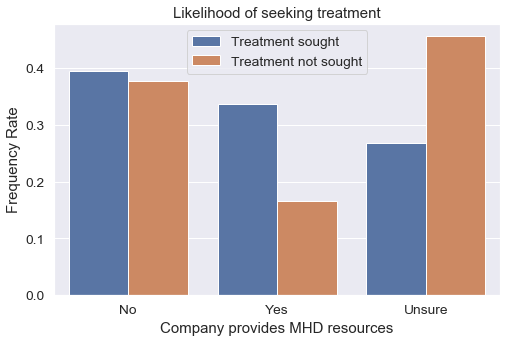

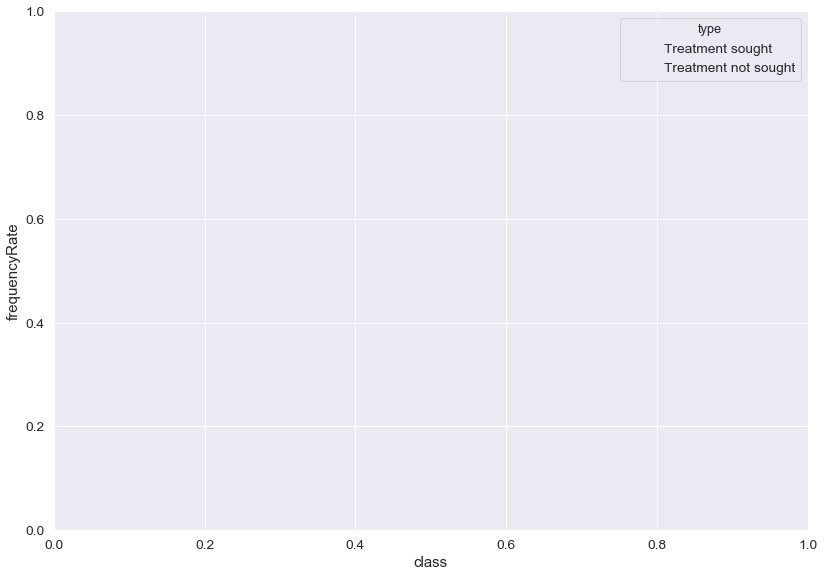

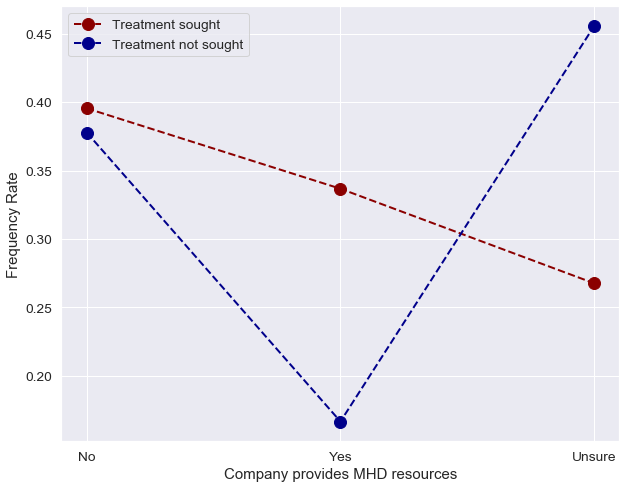

In [2889]:
feat = ['Treatment_sought','MentalH_company_resources']
df11 = train_df[train_df[feat[0]]==1]
df1 = df11[df11[feat[1]] != -1][feat[1]]
m1 = len(df1)
print(df1)
unique1,withT = np.unique(df1, return_counts=True)
df21 = train_df[train_df[feat[0]]==0]
df2 = df21[df21[feat[1]] != -1][feat[1]]
m2 = len(df2)
print(df2)
unique2,withoutT = np.unique(df2, return_counts=True)

df_all = pd.DataFrame(columns = ['class','frequencyRate','type'])
for i in range(len(unique1)):
    dict_i = {'class':unique1[i],'frequencyRate':withT[i]/m1,'type':'Treatment sought'}
    dict_j = {'class':unique2[i],'frequencyRate':withoutT[i]/m2,'type':'Treatment not sought'}
    df_i = pd.DataFrame(dict_i,columns = ['class','frequencyRate','type'], index = [0])
    df_j = pd.DataFrame(dict_j,columns = ['class','frequencyRate','type'], index = [0])
    df_all = df_all.append(df_i, ignore_index = True)
    df_all = df_all.append(df_j, ignore_index = True)

#withoutT = [df2.count(x) for x in df2]
print(df_all)

fig, ax = plt.subplots(figsize=(8,5))
g = sns.catplot(x='class', y='frequencyRate', hue='type', data=df_all, kind='bar', height=8.27, aspect=11.7/8.27, legend=True, legend_out=False, ax=ax)
ax.set_title('Likelihood of seeking treatment')
ax.set_ylabel('Frequency Rate')
ax.set_xlabel('Company provides MHD resources')
ax.set_xticklabels(['No','Yes', 'Unsure'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
fig.savefig('plots_qA/plot_bars_MentalH_company_resources_frequencyRate.png')

'''
no_na2 = train_df[train_df['MentalH_company_info'] != -1]
g = sns.catplot(x="MentalH_company_info", y="Treatment_sought", data=no_na2, kind="bar", ci = 95, height=5, aspect=2, legend_out = True)
plt.title('Likelihood of seeking treatment')
plt.ylabel('Probability')
plt.xlabel('Company provides information on MHD resources')
g.set_xticklabels(['No', 'Yes', 'Unsure']);
'''

cls1 = df_all[df_all['type']=='Treatment sought']['class']
freqR1 = df_all[df_all['type']=='Treatment sought']['frequencyRate']
cls0 = df_all[df_all['type']=='Treatment not sought']['class']
freqR0 = df_all[df_all['type']=='Treatment not sought']['frequencyRate']
print(cls0)
print(freqR0)
plt.figure(figsize=(10,8))
#plt.subplot(211)
plt.plot(cls1, freqR1, 'ok', color = 'darkred', marker='o', linestyle='dashed',linewidth=2, markersize=12, label='Treatment sought')
plt.plot(cls0, freqR0, 'ok', color = 'darkblue', marker='o', linestyle='dashed',linewidth=2, markersize=12, label='Treatment not sought')
plt.grid(True)
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Frequency Rate')
plt.xticks(ticks=[0,1,2],labels=['No','Yes', 'Unsure'])
plt.xlabel('Company provides MHD resources')
plt.legend()
plt.savefig('plots_qA/plot_markers_MentalH_company_resources_frequencyRate.png')


413    1
424    1
752    1
478    1
158    1
      ..
464    1
25     1
110    2
149    1
152    1
Name: MentalH_insurance, Length: 564, dtype: int64
140    1
311    2
658    1
142    0
791    2
      ..
704    2
724    1
438    2
274    1
710    2
Name: MentalH_insurance, Length: 88, dtype: int64
  class  frequencyRate                  type
0     0       0.067376      Treatment sought
1     0       0.068182  Treatment not sought
2     1       0.744681      Treatment sought
3     1       0.488636  Treatment not sought
4     2       0.187943      Treatment sought
5     2       0.443182  Treatment not sought
1    0
3    1
5    2
Name: class, dtype: object
1    0.068182
3    0.488636
5    0.443182
Name: frequencyRate, dtype: float64


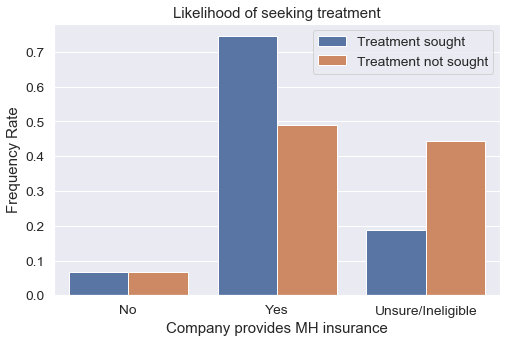

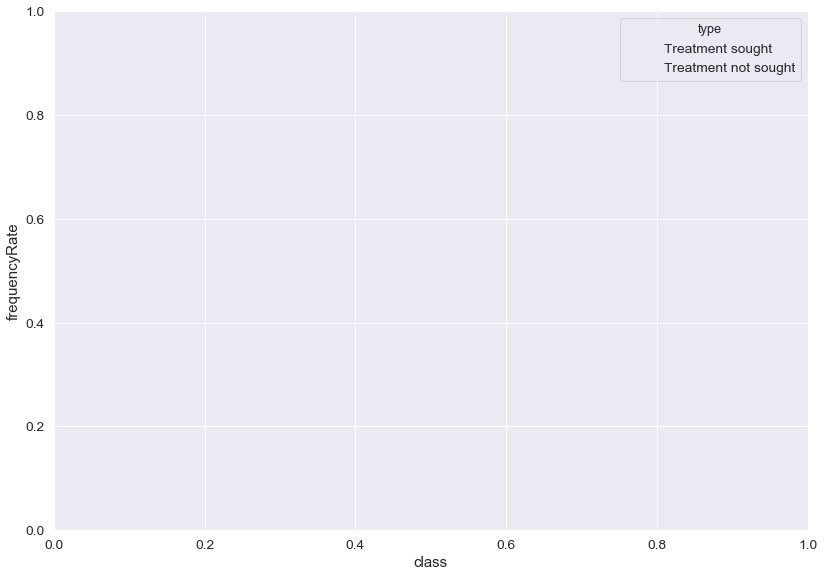

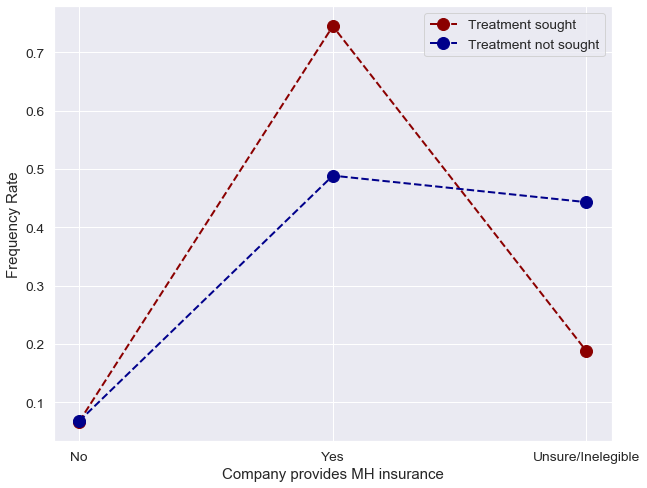

In [2891]:
feat = ['Treatment_sought','MentalH_insurance']
df11 = train_df[train_df[feat[0]]==1]
df1 = df11[df11[feat[1]] != 3][feat[1]]
m1 = len(df1)
print(df1)
unique1,withT = np.unique(df1, return_counts=True)
df21 = train_df[train_df[feat[0]]==0]
df2 = df21[df21[feat[1]] != 3][feat[1]]
m2 = len(df2)
print(df2)
unique2,withoutT = np.unique(df2, return_counts=True)

df_all = pd.DataFrame(columns = ['class','frequencyRate','type'])
for i in range(len(unique1)):
    dict_i = {'class':unique1[i],'frequencyRate':withT[i]/m1,'type':'Treatment sought'}
    dict_j = {'class':unique2[i],'frequencyRate':withoutT[i]/m2,'type':'Treatment not sought'}
    df_i = pd.DataFrame(dict_i,columns = ['class','frequencyRate','type'], index = [0])
    df_j = pd.DataFrame(dict_j,columns = ['class','frequencyRate','type'], index = [0])
    df_all = df_all.append(df_i, ignore_index = True)
    df_all = df_all.append(df_j, ignore_index = True)

#withoutT = [df2.count(x) for x in df2]
print(df_all)

fig, ax = plt.subplots(figsize=(8,5))
g = sns.catplot(x='class', y='frequencyRate', hue='type', data=df_all, kind='bar', height=8.27, aspect=11.7/8.27, legend=True, legend_out=False, ax=ax)
ax.set_title('Likelihood of seeking treatment')
ax.set_ylabel('Frequency Rate')
ax.set_xlabel('Company provides MH insurance')
ax.set_xticklabels(['No','Yes', 'Unsure/Ineligible'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
fig.savefig('plots_qA/plot_bars_MentalH_insurance_frequencyRate.png')


'''
no_na3 = train_df[train_df['MentalH_insurance'] != 3]
g = sns.catplot(x="MentalH_insurance", y="Treatment_sought", data=no_na3, kind="bar", ci = 95, height=5, aspect=2, legend_out = True)
plt.title('Likelihood of seeking treatment')
plt.ylabel('Probability')
plt.xlabel('Company provides MH insurance')
g.set_xticklabels(['No', 'Yes', 'Unsure/Ineligible']);
'''

cls1 = df_all[df_all['type']=='Treatment sought']['class']
freqR1 = df_all[df_all['type']=='Treatment sought']['frequencyRate']
cls0 = df_all[df_all['type']=='Treatment not sought']['class']
freqR0 = df_all[df_all['type']=='Treatment not sought']['frequencyRate']
print(cls0)
print(freqR0)
plt.figure(figsize=(10,8))
#plt.subplot(211)
plt.plot(cls1, freqR1, 'ok', color = 'darkred', marker='o', linestyle='dashed',linewidth=2, markersize=12, label='Treatment sought')
plt.plot(cls0, freqR0, 'ok', color = 'darkblue', marker='o', linestyle='dashed',linewidth=2, markersize=12, label='Treatment not sought')
plt.grid(True)
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Frequency Rate')
plt.xticks(ticks=[0,1,2],labels=['No','Yes', 'Unsure/Inelegible'])
plt.xlabel('Company provides MH insurance')
plt.legend()
plt.savefig('plots_qA/plot_markers_MentalH_insurance_frequencyRate.png')

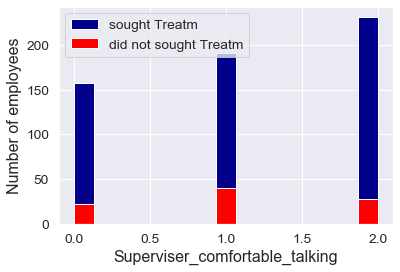

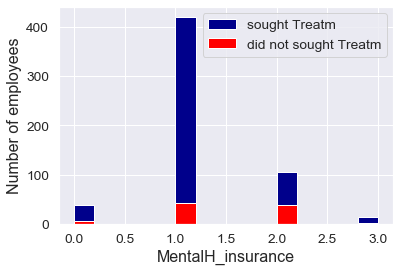

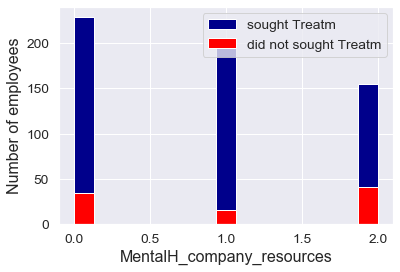

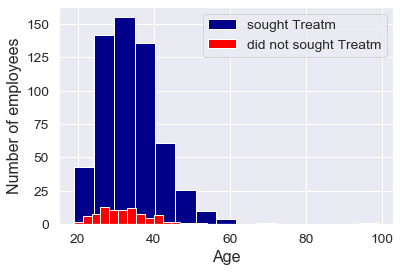

In [2773]:
def plotFeatures(data_dframe,f1):
    feat1 = str(f1)
    #separate features vs class
    df_soughtT = data_dframe[data_dframe['Treatment_sought'] == 1]
    df_not_soughtT = data_dframe[data_dframe['Treatment_sought'] == 0]
    #plot features vs class
    fig,ax = plt.subplots()
    bval,bins,patches = plt.hist(df_soughtT[feat1].astype(float),bins = 15,facecolor="darkblue",label='sought Treatm')
    bval,bins,patches = plt.hist(df_not_soughtT[feat1].astype(float),bins = 15,facecolor="red",label='did not sought Treatm')
    ax.legend()
    plt.xlabel(feat1,fontsize = 16)
    plt.ylabel('Number of employees',fontsize = 16)
    #plt.savefig('plot_'+feat1+'.png')
    
featList = ['Superviser_comfortable_talking','MentalH_insurance','MentalH_company_resources','Age']
for i in range(len(featList)):
        plotFeatures(train_df,featList[i])
        #plt.close("all")

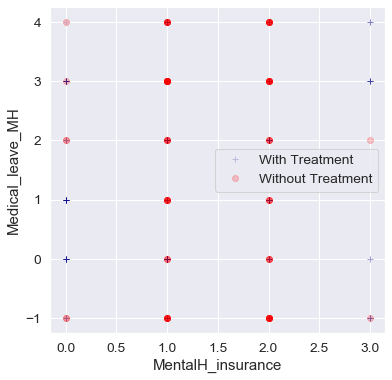

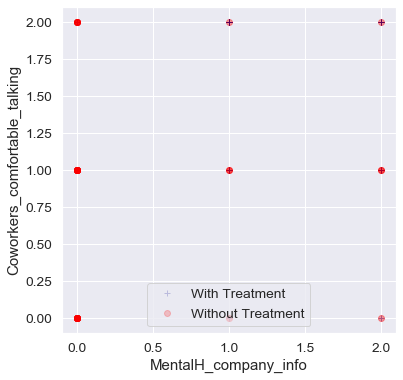

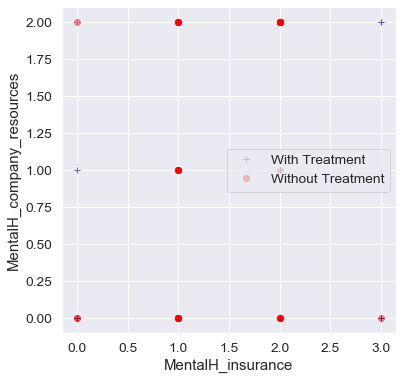

In [2774]:
def plotFeaturesvsST(data_dframe,f1,f2):
    fig = plt.figure(figsize=(6,6))
    main_ax = fig.add_subplot()
    feat1 = str(f1)
    feat2 = str(f2)
    #separate features vs class
    df_withT = data_dframe[data_dframe['Treatment_sought']== 1]
    df_withoutT = data_dframe[data_dframe['Treatment_sought']== 0]
    #plot features vs class
    main_ax.plot(df_withT[feat1].astype(float),df_withT[feat2].astype(float),'ok', marker='+',markersize=6,alpha=0.2,color="darkblue",label='With Treatment')
    main_ax.plot(df_withoutT[feat1].astype(float),df_withoutT[feat2].astype(float),'ok', marker='o',markersize=6,alpha=0.2,color="red",label='Without Treatment')
    main_ax.grid(True)
    main_ax.set_ylabel(feat2)
    main_ax.set_xlabel(feat1)
    main_ax.legend()
    #fig.savefig('Tsought_for_'+feat1+'vs'+feat2+'.png')
plotFeaturesvsST(train_df,'MentalH_insurance','Medical_leave_MH')
plotFeaturesvsST(train_df,'MentalH_company_info','Coworkers_comfortable_talking')
plotFeaturesvsST(train_df,'MentalH_insurance','MentalH_company_resources')

In [2775]:
feature_cols = ['Anonymity_protection', 'Company_size',
       'Coworkers_comfortable_talking',
       'Discouranged_in_revealing_MHD_at_work', 
       'Family_history_MHD', 
       'MHD_identification_effect_on_career',
       'MHD_identification_team_reaction', 'Medical_leave_MH',
       'MentalH_company_info', 'MentalH_company_resources',
       'MentalH_insurance', 
       'Past_MHD', 
       'Superviser_comfortable_talking',
       'Age',
       'Gender']
                
X_train = train_df[feature_cols].values
y_train = np.array(train_df['Treatment_sought'])
X_test = test_dframe[feature_cols].values
y_test = np.array(test_dframe['Treatment_sought'])

Feature ranking:
1. feature 13 (0.148291)
2. feature 6 (0.090122)
3. feature 7 (0.085288)
4. feature 1 (0.079729)
5. feature 10 (0.067322)
6. feature 2 (0.062348)
7. feature 5 (0.062213)
8. feature 4 (0.062154)
9. feature 11 (0.060083)
10. feature 3 (0.059381)
11. feature 9 (0.057657)
12. feature 12 (0.050168)
13. feature 14 (0.042499)
14. feature 8 (0.039225)
15. feature 0 (0.033520)


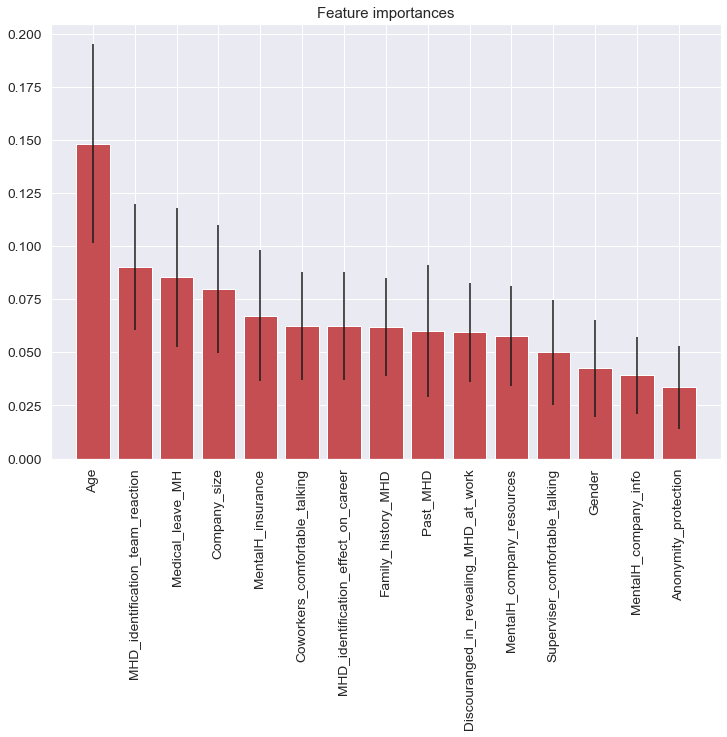

In [2776]:
# Build a forest and compute the feature importances
#forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')

rfmodel = forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

labels = []
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    labels.append(feature_cols[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
#plt.show()
plt.savefig('plots_qA/FeaturesImportance.png')

In [2777]:
rf_score1 = forest.score(X_test, y_test)

rf_ypred = rfmodel.predict(X_test)

rf_score = rfmodel.score(X_test, y_test)
rf_recall = recall_score(y_test, rf_ypred)
rf_confmat = confusion_matrix(y_test, rf_ypred)
rf_f1 = f1_score(y_test, rf_ypred)
#rf_auc = roc_auc_score(y_test, rf_ypred)
rf_yprob = rfmodel.predict_proba(X_test)
rf_yprob = [p[1] for p in rf_yprob]
rf_auc = roc_auc_score(y_test,rf_yprob)
print('*RANDOM FOREST*')
print('Accuracy: ', rf_score)
print('Recall: ',rf_recall)
print('F1: ', rf_f1)
print('AUC: ',rf_auc)
print(rf_confmat)


*RANDOM FOREST*
Accuracy:  0.8203592814371258
Recall:  0.9781021897810219
F1:  0.8993288590604027
AUC:  0.6871046228710463
[[  3  27]
 [  3 134]]


In [2778]:
# logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
    
log_ypred = logreg.predict(X_test)
    
log_score = logreg.score(X_test, y_test)
log_recall = recall_score(y_test, log_ypred)
log_confmat = confusion_matrix(y_test, log_ypred)
log_f1 = f1_score(y_test, log_ypred)
#log_auc = roc_auc_score(y_test, log_ypred)
log_yprob = logreg.predict_proba(X_test)
log_yprob = [p[1] for p in log_yprob]
log_auc = roc_auc_score(y_test,log_yprob)

print('*LOGISTIC REGRESSION*')
print('Accuracy: ', log_score)
print('Recall: ',log_recall)
print('F1: ', log_f1)
print('AUC: ',log_auc)
print(log_confmat)

*LOGISTIC REGRESSION*
Accuracy:  0.8083832335329342
Recall:  0.9781021897810219
F1:  0.8933333333333333
AUC:  0.6343065693430657
[[  1  29]
 [  3 134]]


/Users/ioana/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [2779]:
# KNN with different number of neighbors
knn_train_scores = []
for i in range(3, len(feature_cols), 2):
    knn_tune = KNeighborsClassifier(n_neighbors = i)
    knn_tune.fit(X_train, y_train)
    one_score = cross_val_score(knn_tune, X_train, y_train, cv = 10, scoring = 'accuracy')
    knn_train_scores.append(np.average(one_score))
print('*KNN*')
print('Best NN:', np.argmax(knn_train_scores) + 3)
print('Accuracy on Training Set:', knn_train_scores[np.argmax(knn_train_scores)])
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_ypred = knn.predict(X_test)
knn_confmat = confusion_matrix(y_test, knn_ypred)
knn_f1 = f1_score(y_test, knn_ypred)
knn_recall = recall_score(y_test, knn_ypred)
#knn_auc = roc_auc_score(y_test, knn_ypred)
knn_yprob = knn.predict_proba(X_test)
knn_yprob = [p[1] for p in knn_yprob]
knn_auc = roc_auc_score(y_test,knn_yprob)
print('Accuracy on Test Set: ', knn.score(X_test, y_test))
print('Recall: ', knn_recall)
print('F1: ', knn_f1)
print('AUC: ', knn_auc)
print(knn_confmat)

*KNN*
Best NN: 7
Accuracy on Training Set: 0.8699683401175937
Accuracy on Test Set:  0.8203592814371258
Recall:  1.0
F1:  0.9013157894736842
AUC:  0.5442822384428224
[[  0  30]
 [  0 137]]


In [2780]:
# SVM model
svcModel = SVC(kernel='rbf',gamma = 'scale',C=1.0).fit(X_train,y_train)
svc_ypred = svcModel.predict(X_test)
svc_confmat = confusion_matrix(y_test, svc_ypred)
svc_recall = recall_score(y_test, svc_ypred)
svc_f1 = f1_score(y_test, svc_ypred)
svc_auc = roc_auc_score(y_test, svc_ypred)
#svc_yprob = svcModel.predict_proba(X_test)
#svc_yprob = [p[1] for p in svc_yprob]
#svc_auc = roc_auc_score(y_test,svc_yprob)
print('Accuracy on Test Set:', svcModel.score(X_test, y_test))
print('Recall: ',svc_recall)
print('F1: ', svc_f1)
print('AUC: ', svc_auc)
print(svc_confmat)

#print('SVC: precision_score = ',precision_score(y_test,svc_ypred)

Accuracy on Test Set: 0.8203592814371258
Recall:  1.0
F1:  0.9013157894736842
AUC:  0.5
[[  0  30]
 [  0 137]]


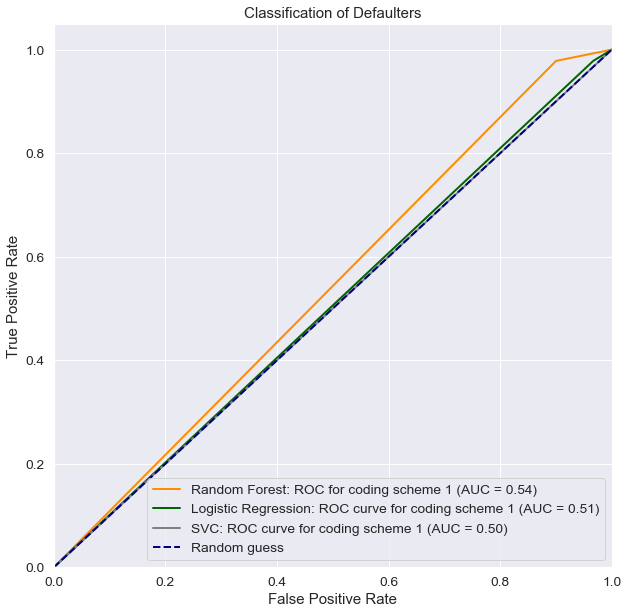

In [2781]:
rf_roc_p = roc_curve(y_test, rf_ypred)
rf_auc_p = auc( rf_roc_p[0], rf_roc_p[1] )

log_roc_p = roc_curve(y_test, log_ypred)
log_auc_p = auc( log_roc_p[0], log_roc_p[1] )

knn_roc_p = roc_curve(y_test, knn_ypred)
knn_auc_p = auc( knn_roc_p[0], knn_roc_p[1] )

svc_roc_p = roc_curve(y_test, svc_ypred)
svc_auc_p = auc( svc_roc_p[0], svc_roc_p[1] )


plt.figure(figsize=(10,10))
lw = 2
plt.plot(rf_roc_p[0], rf_roc_p[1], color='darkorange', 
         lw=lw, label='Random Forest: ROC for coding scheme 1 (AUC = %0.2f)' % rf_auc_p)
plt.plot(log_roc_p[0], log_roc_p[1], color='darkgreen',
         lw=lw, label='Logistic Regression: ROC curve for coding scheme 1 (AUC = %0.2f)' % log_auc_p)
#plt.plot(knn_roc_p[0], knn_roc_p[1], color='purple',
#         lw=lw, label='kNN: ROC curve for coding scheme 1 (AUC = %0.2f)' % knn_auc_p)
plt.plot(svc_roc_p[0], svc_roc_p[1], color='grey',
         lw=lw, label='SVC: ROC curve for coding scheme 1 (AUC = %0.2f)' % svc_auc_p)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc="lower right")
#plt.show()
plt.savefig('plots_qA/AUC_plot_randstate10.png')